<a href="https://colab.research.google.com/github/Mateus-Brandao/Estudo/blob/main/Regressao_com_redes_neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler

In [2]:
dados = pd.read_csv('Passageiros.csv')
dados.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [3]:
mpl.rcParams['figure.figsize'] = (12,6)
mpl.rcParams['font.size'] = 14

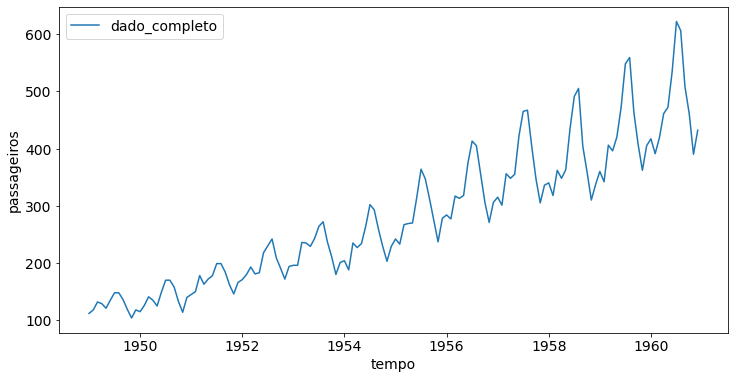

In [4]:
sns.lineplot(data = dados, x = 'tempo', y = 'passageiros', label = 'dado_completo')

In [5]:
sc = StandardScaler()

sc.fit(dados)

dado_escalado = sc.transform(dados)

In [6]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

Text(0, 0.5, 'Passageiros')

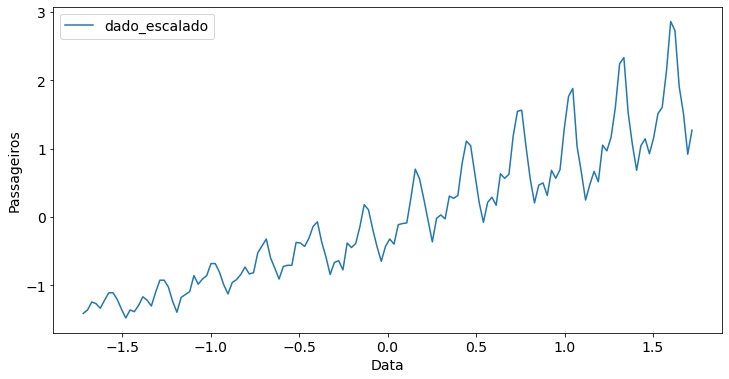

In [7]:
sns.lineplot(x = x, y = y, label = 'dado_escalado')
plt.xlabel('Data')
plt.ylabel('Passageiros')

In [8]:
tamanho_treino = int(len(dados)*0.8)
tamanho_teste = len(dados) - tamanho_treino

In [9]:
x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]

x_teste = x[tamanho_treino:len(dados)]
y_teste = y[tamanho_treino:len(dados)]

Text(0, 0.5, 'Passageiros')

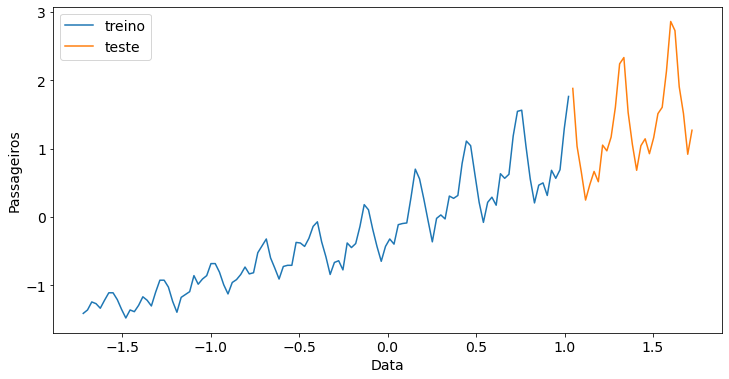

In [10]:
sns.lineplot(x = x_treino, y = y_treino, label = 'treino')
sns.lineplot(x = x_teste, y = y_teste, label = 'teste')
plt.xlabel('Data')
plt.ylabel('Passageiros')

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
regressor = Sequential()

regressor.add(Dense(1, input_dim = 1, kernel_initializer='Ones', activation = 'linear', use_bias = False))

In [13]:
regressor.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [14]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [15]:
regressor.fit(x_treino,y_treino)

4/4 [==============================] - 1s 3ms/step - loss: 0.1017


In [16]:
y_predict = regressor.predict(x_treino)

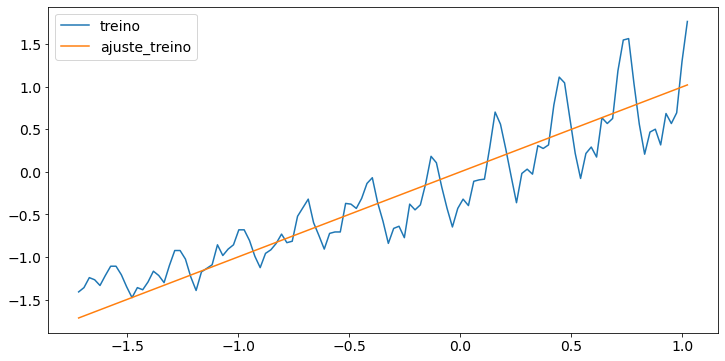

In [17]:
sns.lineplot(x = x_treino, y = y_treino, label = 'treino')
sns.lineplot(x = x_treino, y = y_predict[:,0], label = 'ajuste_treino')

In [18]:
d = {'tempo':x_treino, 'passageiros':y_predict[:,0]}

In [19]:
resultados = pd.DataFrame(data = d)
resultados.head()

,tempo,passageiros
0,-1.720064,-1.713435
1,-1.696007,-1.689471
2,-1.671950,-1.665506
3,-1.647894,-1.641542
4,-1.623837,-1.617578


In [20]:
resultados_transformados = sc.inverse_transform(resultados)

resultados_transformados = pd.DataFrame(resultados_transformados)

resultados_transformados.columns = ['tempo','passageiros']

resultados_transformados.head()

,tempo,passageiros
0,1949.000000,75.459135
1,1949.083333,78.324014
2,1949.166667,81.188922
3,1949.250000,84.053801
4,1949.333333,86.918694


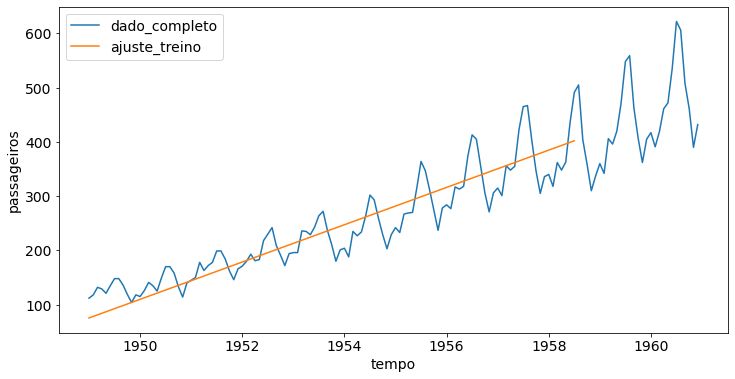

In [21]:
sns.lineplot(data = dados, x = 'tempo', y = 'passageiros', label = 'dado_completo')
sns.lineplot(data = resultados_transformados, x = 'tempo', y = 'passageiros', label = 'ajuste_treino')

In [22]:
y_predict_teste = regressor.predict(x_teste)

In [23]:
d = {'tempo':x_teste, 'passageiros':y_predict_teste[:,0]}

In [24]:
resultados_teste = pd.DataFrame(data = d)

resultados_transformados_teste = sc.inverse_transform(resultados_teste)

resultados_transformados_teste = pd.DataFrame(resultados_transformados_teste)

resultados_transformados_teste.columns = ['tempo','passageiros']

resultados_transformados_teste.head()

,tempo,passageiros
0,1958.583333,404.921221
1,1958.666667,407.786114
2,1958.750000,410.650993
3,1958.833333,413.515900
4,1958.916667,416.380779


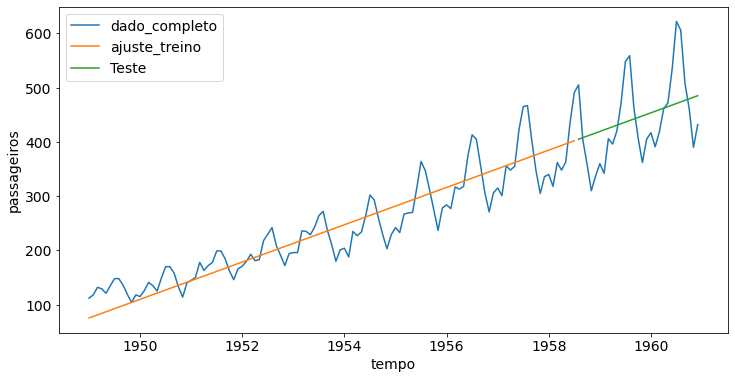

In [25]:
sns.lineplot(data = dados, x = 'tempo', y = 'passageiros', label = 'dado_completo')
sns.lineplot(data = resultados_transformados, x = 'tempo', y = 'passageiros', label = 'ajuste_treino')
sns.lineplot(data = resultados_transformados_teste, x = 'tempo', y = 'passageiros', label = 'Teste')

In [26]:
regressor2 = Sequential()

regressor2.add(Dense(8, input_dim = 1, kernel_initializer= 'random_uniform', activation = 'linear', use_bias = False))

regressor2.add(Dense(8, kernel_initializer= 'random_uniform', activation = 'linear', use_bias = False))

regressor2.add(Dense(1, kernel_initializer = 'random_uniform', activation = 'linear', use_bias = False))


regressor2.compile(loss='mean_squared_error',optimizer = 'adam')

In [27]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [28]:
regressor2.fit(x_treino, y_treino, epochs = 200)

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 0.6924
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6920
Epoch 3/200
4/4 [==============================] - 0s 7ms/step - loss: 0.6915
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 0.6908
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6900
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6889
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6873
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6854
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6827
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6796
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6756
Epoch 12/200
4/4 [==============================] - 0s 6ms/step - loss: 0.6704
Epoch 13/200
4/4 [==============================] - 0s 5ms/st

In [29]:
y_predict = regressor2.predict(x_treino)

In [30]:
d = {'tempo':x_treino, 'passageiros':y_predict[:,0]}

resultados = pd.DataFrame(data = d)

resultados_transformados = sc.inverse_transform(resultados)

resultados_transformados = pd.DataFrame(resultados_transformados)

resultados_transformados.columns = ['tempo','passageiros']

resultados_transformados.head()


,tempo,passageiros
0,1949.000000,97.554695
1,1949.083333,100.110547
2,1949.166667,102.666400
3,1949.250000,105.222267
4,1949.333333,107.778119


In [31]:
y_predict_teste = regressor2.predict(x_teste)

In [32]:
d = {'tempo':x_teste, 'passageiros':y_predict_teste[:,0]}

resultados_teste = pd.DataFrame(data = d)

resultados_transformados_teste = sc.inverse_transform(resultados_teste)

resultados_transformados_teste = pd.DataFrame(resultados_transformados_teste)

resultados_transformados_teste.columns = ['tempo','passageiros']

resultados_transformados_teste.head()

,tempo,passageiros
0,1958.583333,391.478480
1,1958.666667,394.034339
2,1958.750000,396.590192
3,1958.833333,399.146058
4,1958.916667,401.701925


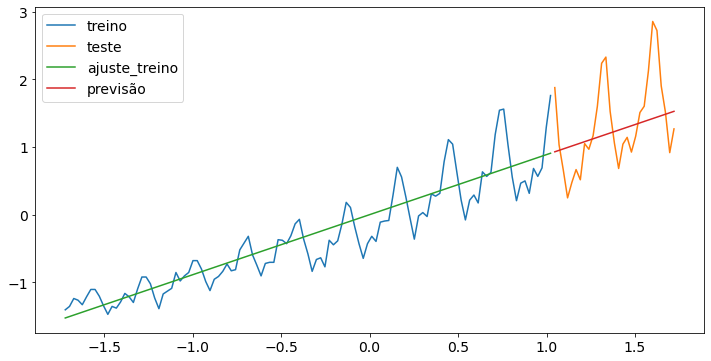

In [33]:
sns.lineplot(x = x_treino, y = y_treino, label = 'treino')
sns.lineplot(x = x_teste, y = y_teste, label = 'teste')
sns.lineplot(x = x_treino, y = y_predict[:,0], label = 'ajuste_treino')
sns.lineplot(x = x_teste, y = y_predict_teste[:,0], label = 'previsão')

### Pensando em um problema diferente

In [34]:
vetor = pd.DataFrame(y_treino)[0]

In [35]:
def separa_dados(vetor,n_passos):
  x_novo, y_novo = [], []

  for i in range (n_passos, vetor.shape[0]):
    x_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])

  x_novo, y_novo = np.array(x_novo), np.array(y_novo)

  return x_novo, y_novo

In [36]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 1)

In [37]:
x_treino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [38]:
y_treino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [39]:
vetor2 = pd.DataFrame(y_teste)[0]

In [40]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 1)

In [41]:
x_teste_novo[0:5]

array([[1.87957499],
       [1.03473342],
       [0.65831886],
       [0.24844523],
       [0.47429396]])

In [42]:
y_teste_novo[0:5]

array([1.03473342, 0.65831886, 0.24844523, 0.47429396, 0.66668363])

In [43]:
regressor3 = Sequential()


regressor3.add(Dense(8, input_dim = 1, kernel_initializer= 'ones', activation = 'linear', use_bias = False))

regressor3.add(Dense(64, kernel_initializer= 'random_uniform', activation = 'sigmoid', use_bias = False))

regressor3.add(Dense(1, kernel_initializer = 'random_uniform', activation = 'linear', use_bias = False))


regressor3.compile(loss='mean_squared_error',optimizer = 'adam')

In [44]:
regressor3.fit(x_treino_novo, y_treino_novo, epochs = 100)

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 0.6977
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6123
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5571
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5302
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5149
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5052
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4921
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4748
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4607
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4413
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4258
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4069
Epoch 13/100
4/4 [==============================] - 0s 6ms/st

In [45]:
y_predict_novo = regressor3.predict(x_treino_novo)

In [46]:
y_predict_teste_novo = regressor3.predict(x_teste_novo)

In [47]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

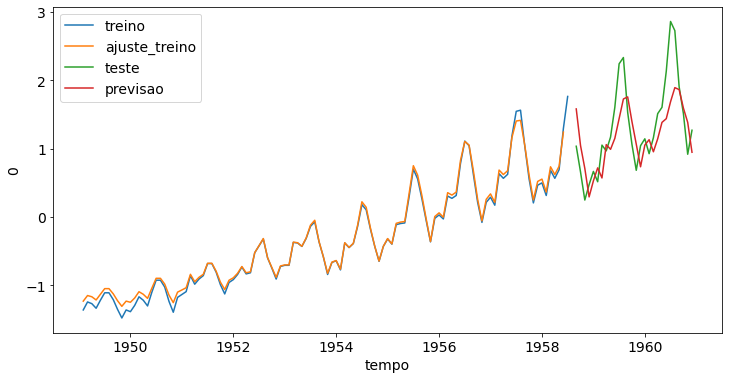

In [48]:
sns.lineplot(x = 'tempo', y = y_treino_novo, data = dados[1:115], label = 'treino')
sns.lineplot(x = 'tempo', y = pd.DataFrame(y_predict_novo)[0], data = dados[1:115], label = 'ajuste_treino')
sns.lineplot(x = 'tempo', y = y_teste_novo, data = dados[116:144], label = 'teste')
sns.lineplot(x = 'tempo', y = resultado.values, data = dados[116:144], label = 'previsao')

In [74]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 4)

In [75]:
x_treino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [76]:
y_treino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [77]:
y_treino_novo.shape

(111,)

In [78]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 4)

In [79]:
regressor4 = Sequential()


regressor4.add(Dense(8, input_dim = 4, kernel_initializer= 'ones', activation = 'linear', use_bias = False))

regressor4.add(Dense(64, kernel_initializer= 'random_uniform', activation = 'sigmoid', use_bias = False))

regressor4.add(Dense(1, kernel_initializer = 'random_uniform', activation = 'linear', use_bias = False))


regressor4.compile(loss='mean_squared_error',optimizer = 'adam')

In [80]:
regressor4.fit(x_treino_novo, y_treino_novo, epochs = 300)

Epoch 1/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5489
Epoch 2/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4807
Epoch 3/300
4/4 [==============================] - 0s 5ms/step - loss: 0.4243
Epoch 4/300
4/4 [==============================] - 0s 6ms/step - loss: 0.3706
Epoch 5/300
4/4 [==============================] - 0s 5ms/step - loss: 0.3240
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2802
Epoch 7/300
4/4 [==============================] - 0s 5ms/step - loss: 0.2366
Epoch 8/300
4/4 [==============================] - 0s 5ms/step - loss: 0.2027
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1735
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1518
Epoch 11/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1345
Epoch 12/300
4/4 [==============================] - 0s 5ms/step - loss: 0.1248
Epoch 13/300
4/4 [==============================] - 0s 4ms/st

In [81]:
y_predict_novo = regressor4.predict(x_treino_novo)

In [82]:
y_predict_teste_novo = regressor4.predict(x_teste_novo)

In [83]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [84]:
resultado_teste = pd.DataFrame(y_predict_teste_novo)[0]

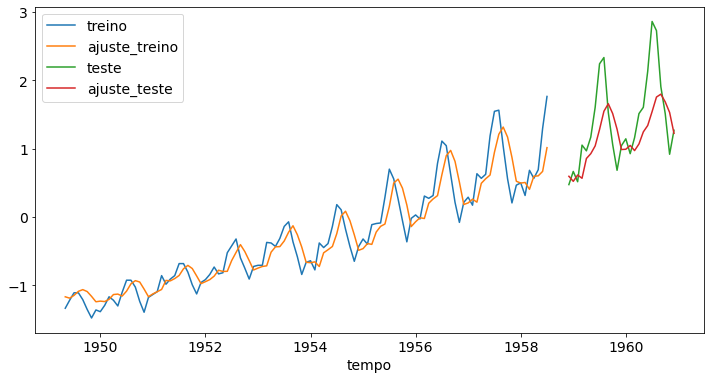

In [88]:
sns.lineplot(x='tempo',y=y_treino_novo,data=dados[4:115], label = 'treino')
sns.lineplot(x='tempo',y=resultado_treino.values,data=dados[4:115], label='ajuste_treino')
sns.lineplot(x='tempo',y=y_teste_novo,data=dados[119:144], label='teste')
sns.lineplot(x='tempo',y=resultado_teste.values,data=dados[119:144], label='ajuste_teste')

# Nova base de dados

In [89]:
dados = pd.read_csv('bicicletas.csv')
dados.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [90]:
dados['datas'] = pd.to_datetime(dados['datas'])

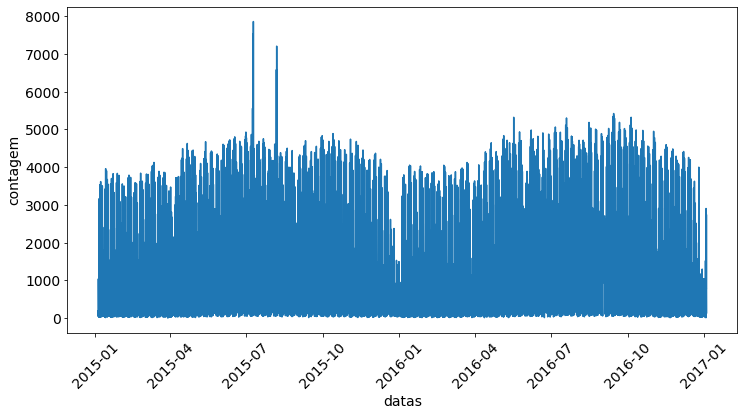

In [94]:
sns.lineplot(data = dados, x = 'datas', y = 'contagem')
plt.xticks(rotation=45)
plt.show()

In [95]:
sc = StandardScaler()

sc.fit(dados['contagem'].values.reshape(-1,1))

y = sc.transform(dados['contagem'].values.reshape(-1,1))

In [96]:
tamanho_treino = int(len(dados)*0.8)
tamanho_teste = len(dados) - tamanho_treino

In [97]:
y_treino = y[0:tamanho_treino]
y_teste = y[tamanho_treino: len(dados)]

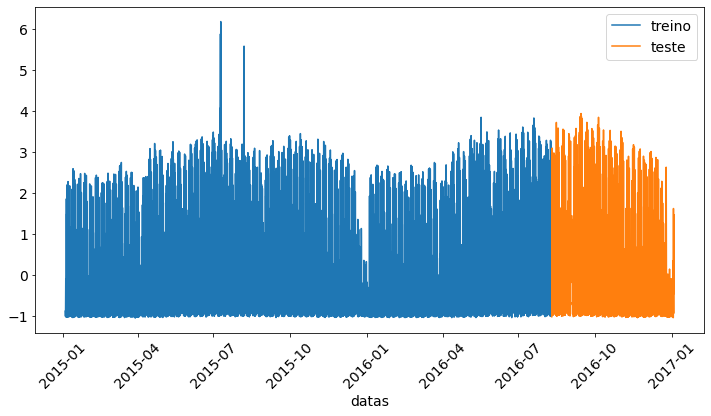

In [103]:
sns.lineplot(data = dados[0:tamanho_treino], x = 'datas', y = y_treino[:,0], label = 'treino')
sns.lineplot(data = dados[tamanho_treino:len(dados)], x = 'datas', y = y_teste[:,0], label = 'teste')

plt.xticks(rotation=45)
plt.show()

In [104]:
vetor = pd.DataFrame(y_treino)[0]

In [105]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 10)

In [106]:
vetor2 = pd.DataFrame(y_teste)[0]

In [107]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 10)

In [109]:
x_treino_novo = x_treino_novo.reshape((x_treino_novo.shape[0], x_treino_novo.shape[1], 1))

In [110]:
x_teste_novo = x_teste_novo.reshape((x_teste_novo.shape[0], x_teste_novo.shape[1], 1))

In [111]:
from tensorflow.keras.layers import LSTM

In [112]:
recorrente = Sequential()

recorrente.add(LSTM(128,input_shape = (x_treino_novo.shape[1], x_treino_novo.shape[2])))
recorrente.add(Dense(units = 1))

recorrente.compile(loss='mean_squared_error', optimizer = 'RMSProp')

In [113]:
recorrente.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [139]:
resultado = recorrente.fit(x_treino_novo, y_treino_novo, validation_data = (x_teste_novo, y_teste_novo), epochs = 10)

Epoch 1/10
436/436 [==============================] - 10s 22ms/step - loss: 0.0305 - val_loss: 0.0371
Epoch 2/10
436/436 [==============================] - 7s 16ms/step - loss: 0.0300 - val_loss: 0.0263
Epoch 3/10
436/436 [==============================] - 5s 12ms/step - loss: 0.0292 - val_loss: 0.0281
Epoch 4/10
436/436 [==============================] - 5s 12ms/step - loss: 0.0292 - val_loss: 0.0249
Epoch 5/10
436/436 [==============================] - 5s 12ms/step - loss: 0.0285 - val_loss: 0.0324
Epoch 6/10
436/436 [==============================] - 5s 12ms/step - loss: 0.0282 - val_loss: 0.0311
Epoch 7/10
436/436 [==============================] - 6s 14ms/step - loss: 0.0278 - val_loss: 0.0308
Epoch 8/10
436/436 [==============================] - 5s 12ms/step - loss: 0.0274 - val_loss: 0.0239
Epoch 9/10
436/436 [==============================] - 5s 12ms/step - loss: 0.0271 - val_loss: 0.0242
Epoch 10/10
436/436 [==============================] - 5s 12ms/step - loss: 0.0268 - val_l

In [116]:
y_ajustado = recorrente.predict(x_treino_novo)

(array([735599., 735658., 735719., 735780., 735842., 735903., 735964.,
        736024., 736085., 736146., 736208.]),
 <a list of 11 Text major ticklabel objects>)

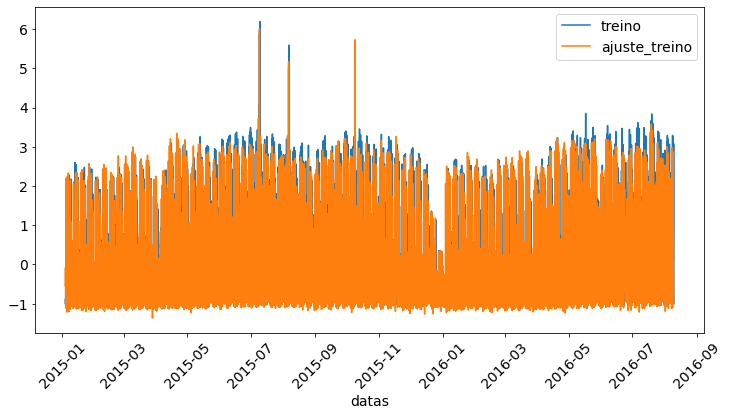

In [120]:
sns.lineplot(x='datas',y = y_treino[:,0], data = dados[0:tamanho_treino], label = 'treino')
sns.lineplot(x='datas',y = y_ajustado[:,0], data = dados[0:13921], label = 'ajuste_treino')
plt.xticks(rotation = 45)

In [121]:
 y_predito = recorrente.predict(x_teste_novo)

(array([736208., 736238., 736269., 736299., 736330.]),
 <a list of 5 Text major ticklabel objects>)

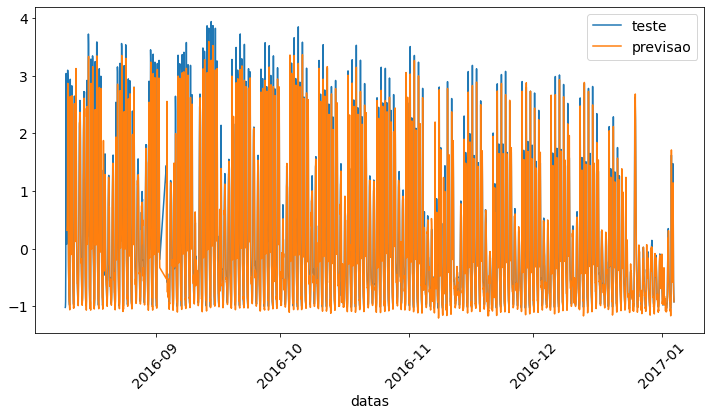

In [124]:
sns.lineplot(x='datas',y = y_teste[:,0], data = dados[tamanho_treino:len(dados)], label = 'teste')
sns.lineplot(x='datas',y = y_predito[:,0], data = dados[tamanho_treino + 10:len(dados)], label = 'previsao')
plt.xticks(rotation = 45)

In [125]:
 from tensorflow.keras.layers import GRU

In [129]:
recorrente_g = Sequential()

recorrente_g.add(GRU(128, input_shape=(x_treino_novo.shape[1],x_treino_novo.shape[2])))
recorrente_g.add(Dense(units=1))

recorrente_g.compile(loss='mean_squared_error', optimizer = 'RMSProp')

In [130]:
recorrente_g.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 128)               50304     
                                                                 
 dense_16 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [135]:
resultado2 = recorrente_g.fit(x_treino_novo, y_treino_novo, validation_data = (x_teste_novo, y_teste_novo), epochs = 10)

Epoch 1/10
436/436 [==============================] - 9s 20ms/step - loss: 0.0314 - val_loss: 0.0274
Epoch 2/10
436/436 [==============================] - 6s 13ms/step - loss: 0.0307 - val_loss: 0.0318
Epoch 3/10
436/436 [==============================] - 7s 15ms/step - loss: 0.0301 - val_loss: 0.0362
Epoch 4/10
436/436 [==============================] - 8s 18ms/step - loss: 0.0300 - val_loss: 0.0240
Epoch 5/10
436/436 [==============================] - 9s 22ms/step - loss: 0.0288 - val_loss: 0.0264
Epoch 6/10
436/436 [==============================] - 6s 13ms/step - loss: 0.0288 - val_loss: 0.0272
Epoch 7/10
436/436 [==============================] - 6s 13ms/step - loss: 0.0280 - val_loss: 0.0352
Epoch 8/10
436/436 [==============================] - 6s 13ms/step - loss: 0.0279 - val_loss: 0.0287
Epoch 9/10
436/436 [==============================] - 6s 13ms/step - loss: 0.0272 - val_loss: 0.0222
Epoch 10/10
436/436 [==============================] - 6s 13ms/step - loss: 0.0273 - val_lo

In [132]:
y_predito2 = recorrente_g.predict(x_teste_novo)

(array([736208., 736238., 736269., 736299., 736330.]),
 <a list of 5 Text major ticklabel objects>)

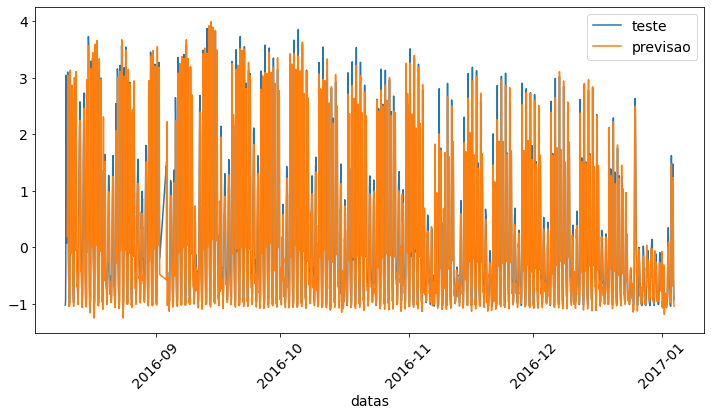

In [134]:
sns.lineplot(x='datas',y = y_teste[:,0], data = dados[tamanho_treino:len(dados)], label = 'teste')
sns.lineplot(x='datas',y = y_predito2[:,0], data = dados[tamanho_treino + 10:len(dados)], label = 'previsao')
plt.xticks(rotation = 45)

Text(0, 0.5, 'Perda')

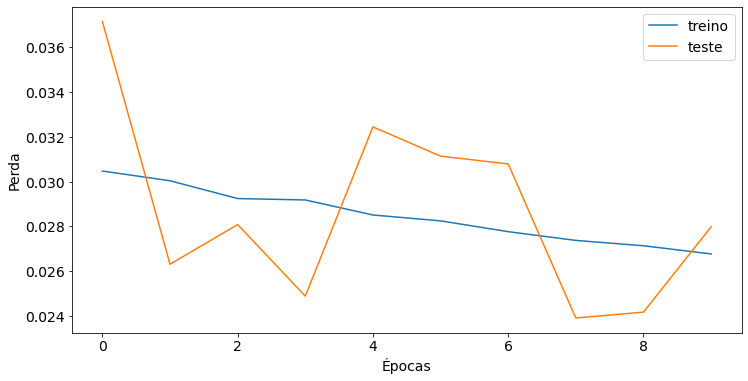

In [144]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])
plt.xlabel('Épocas')
plt.ylabel('Perda')